<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


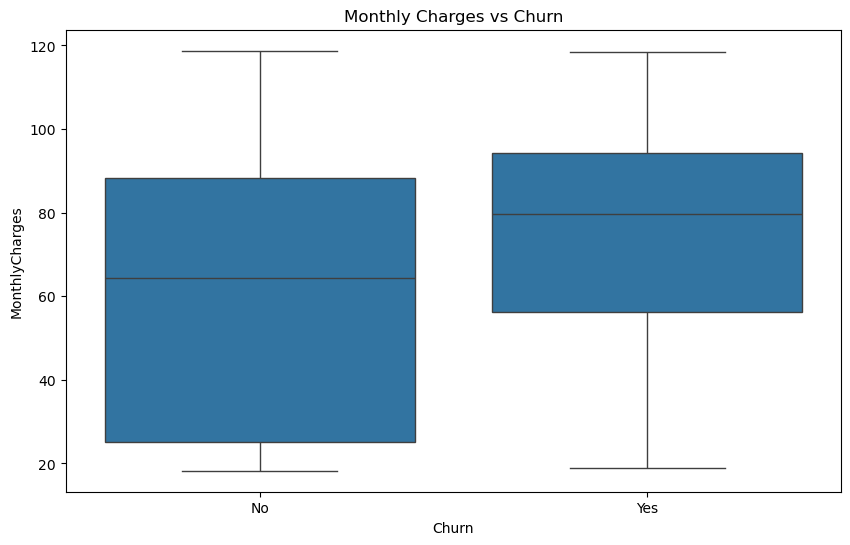

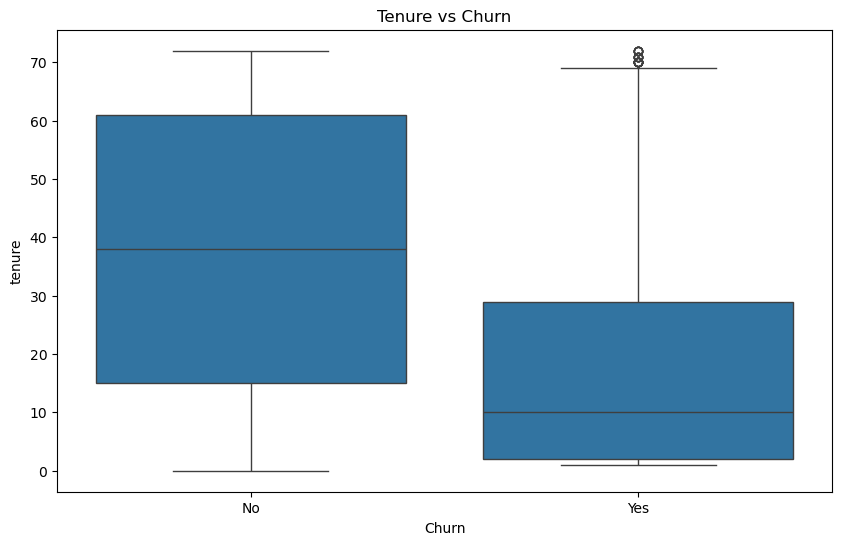

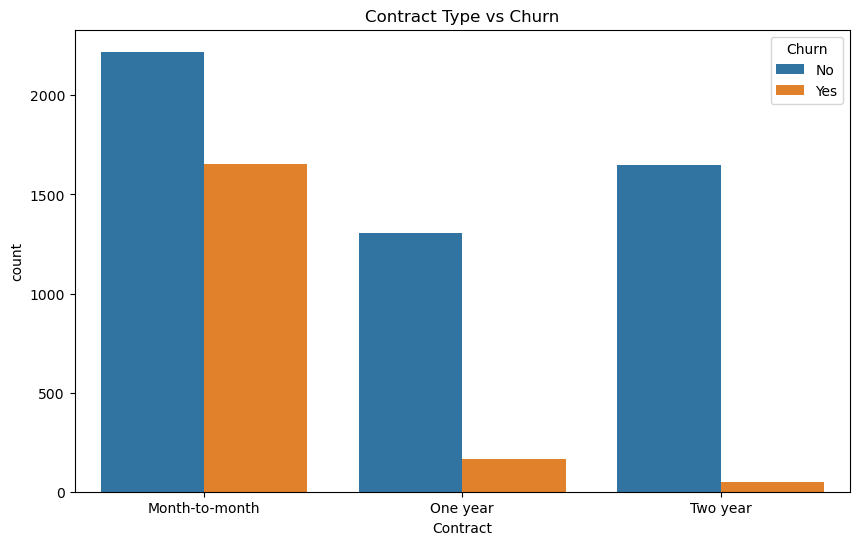

Non-numeric columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


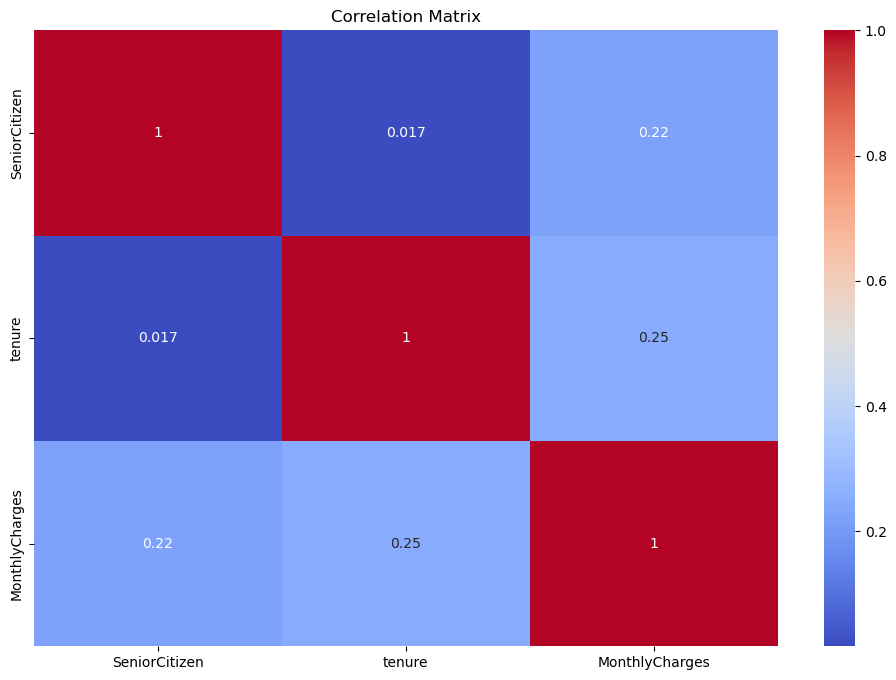

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


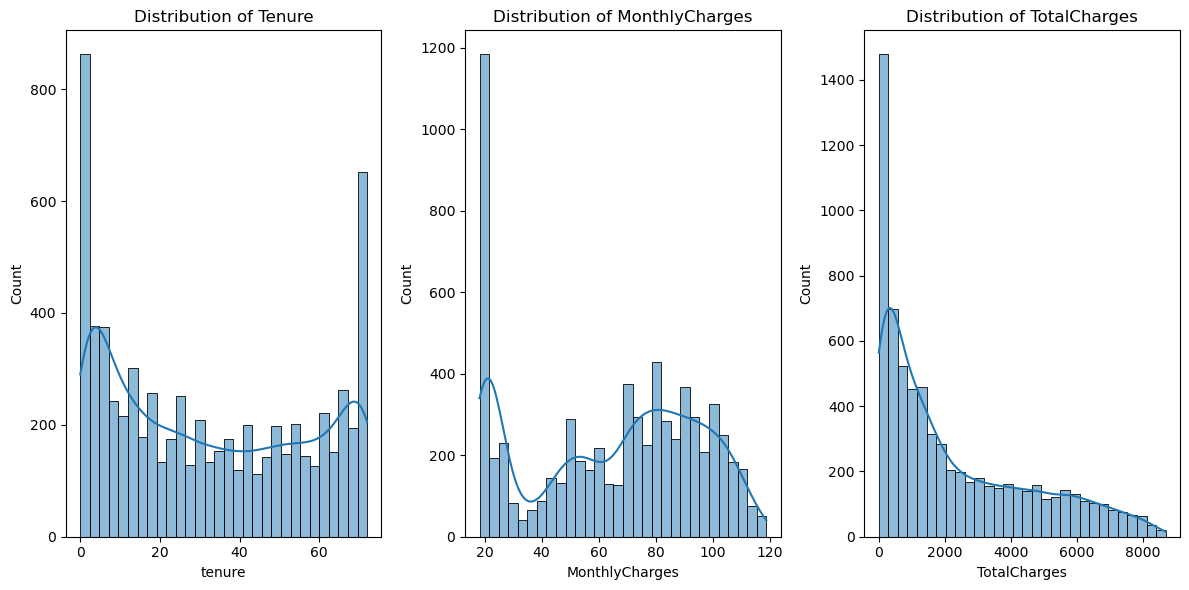

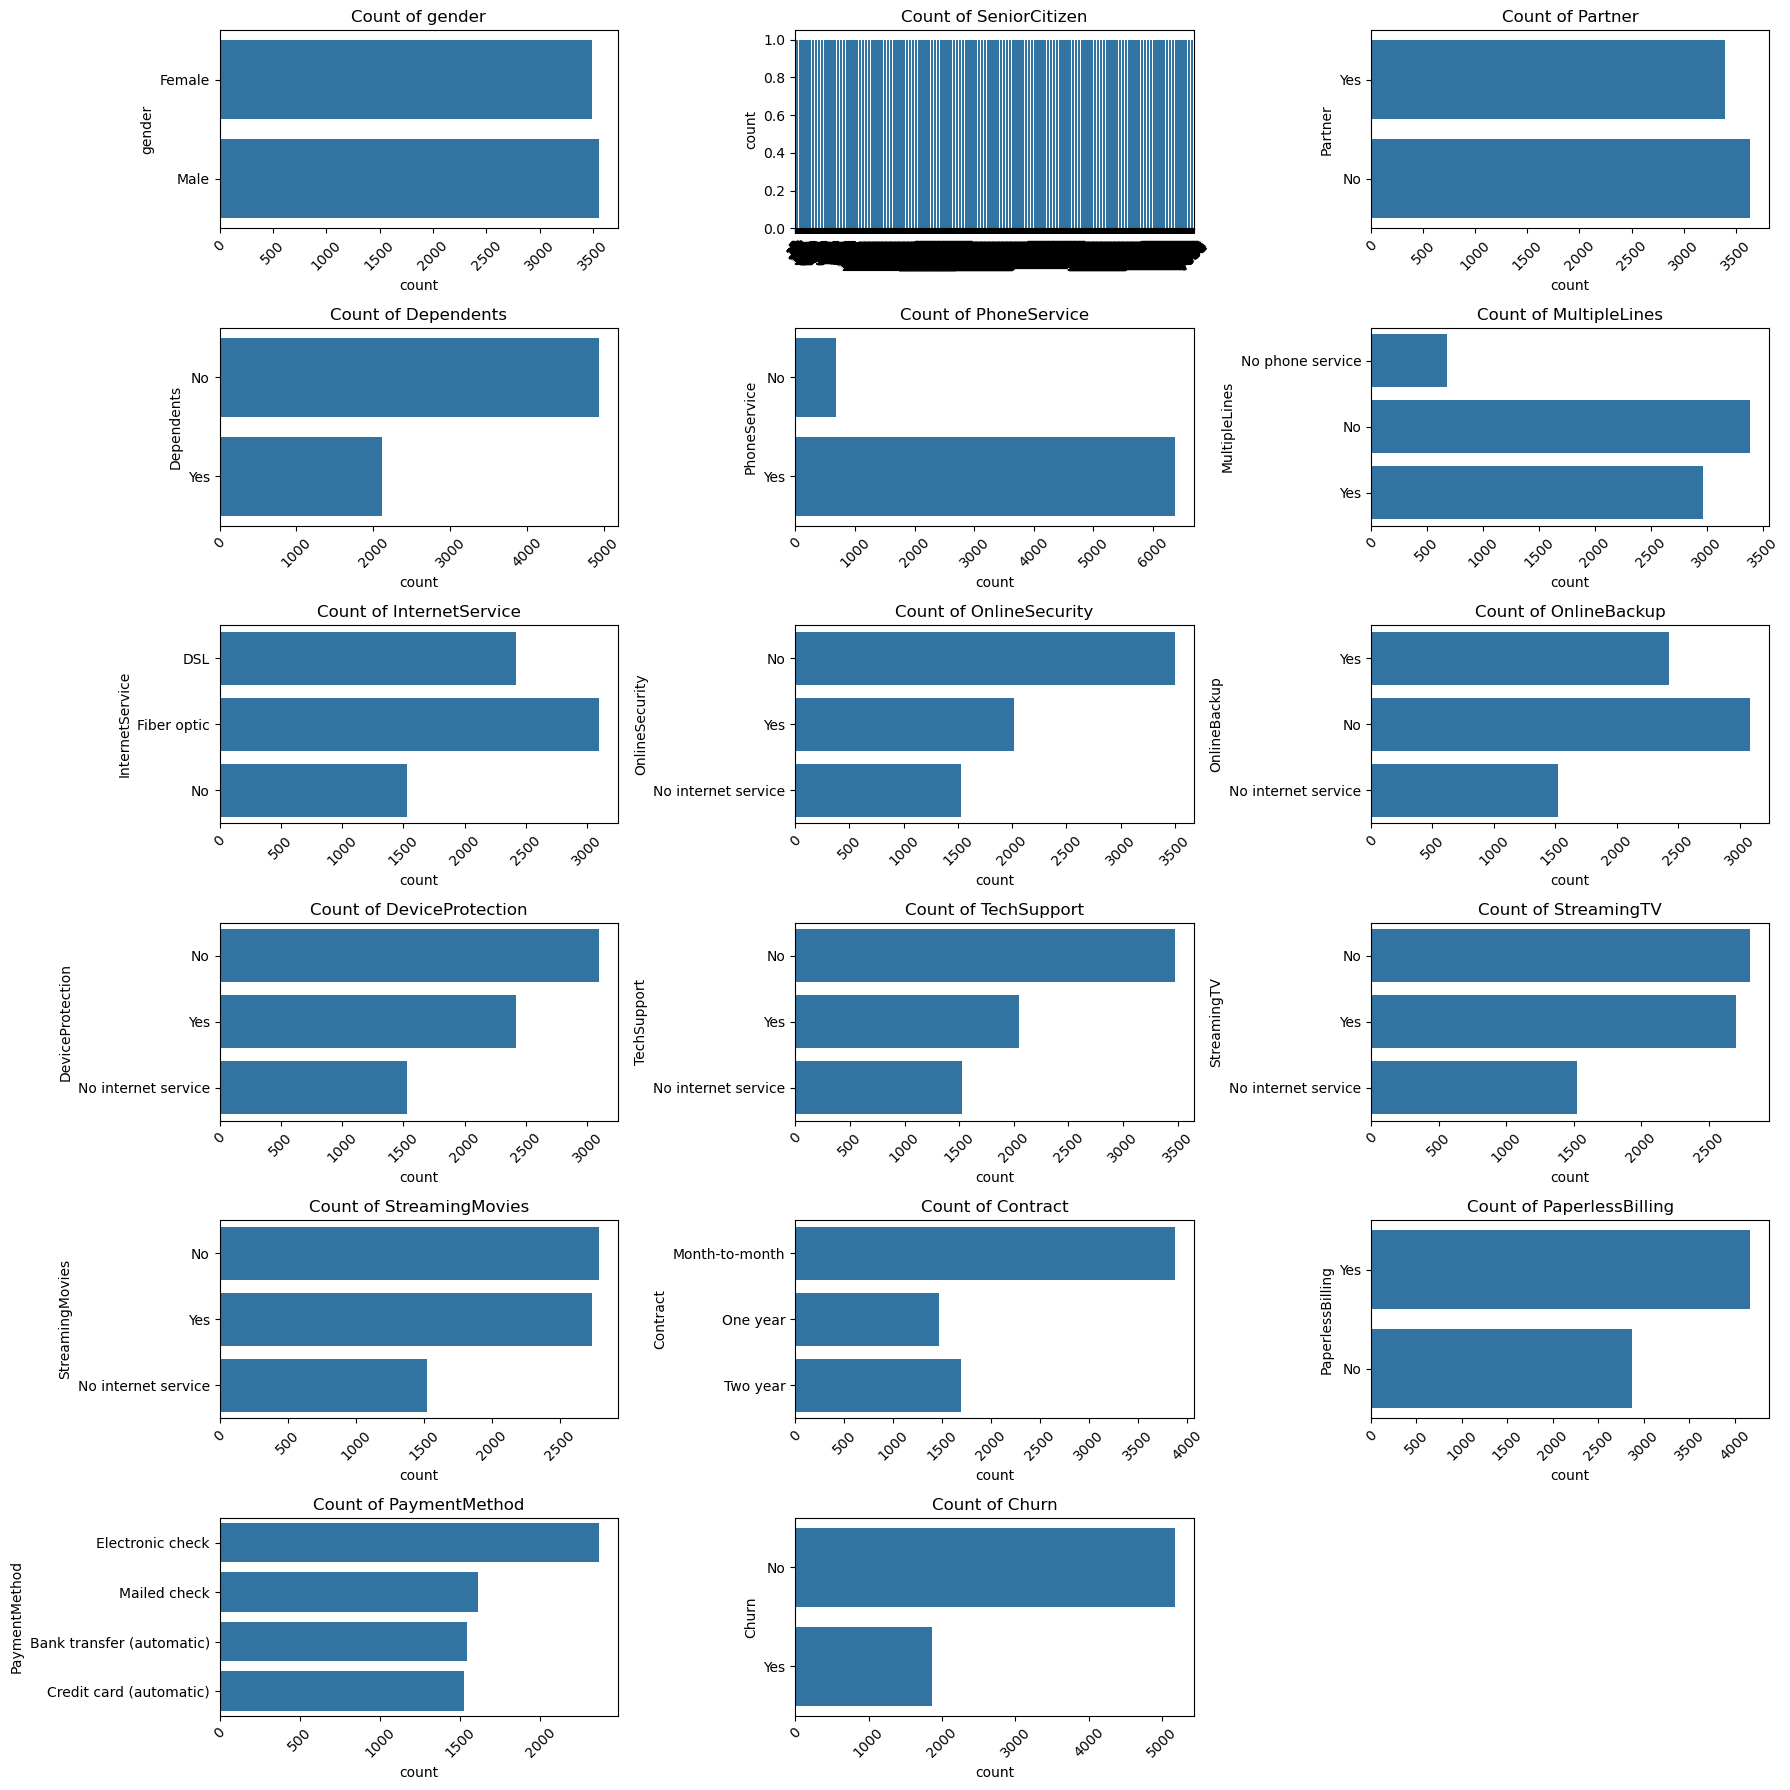

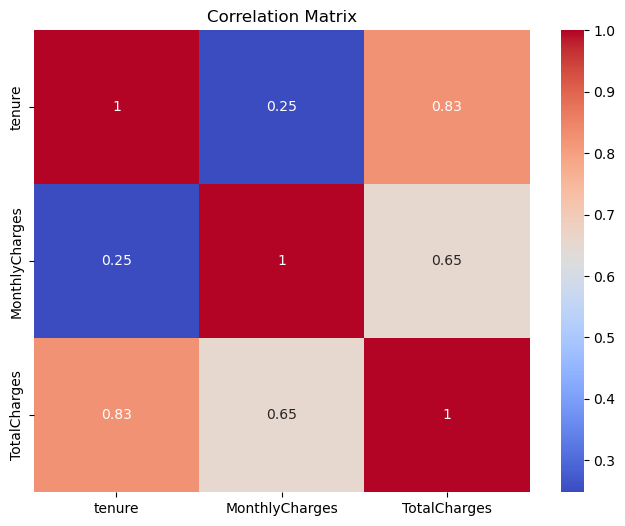

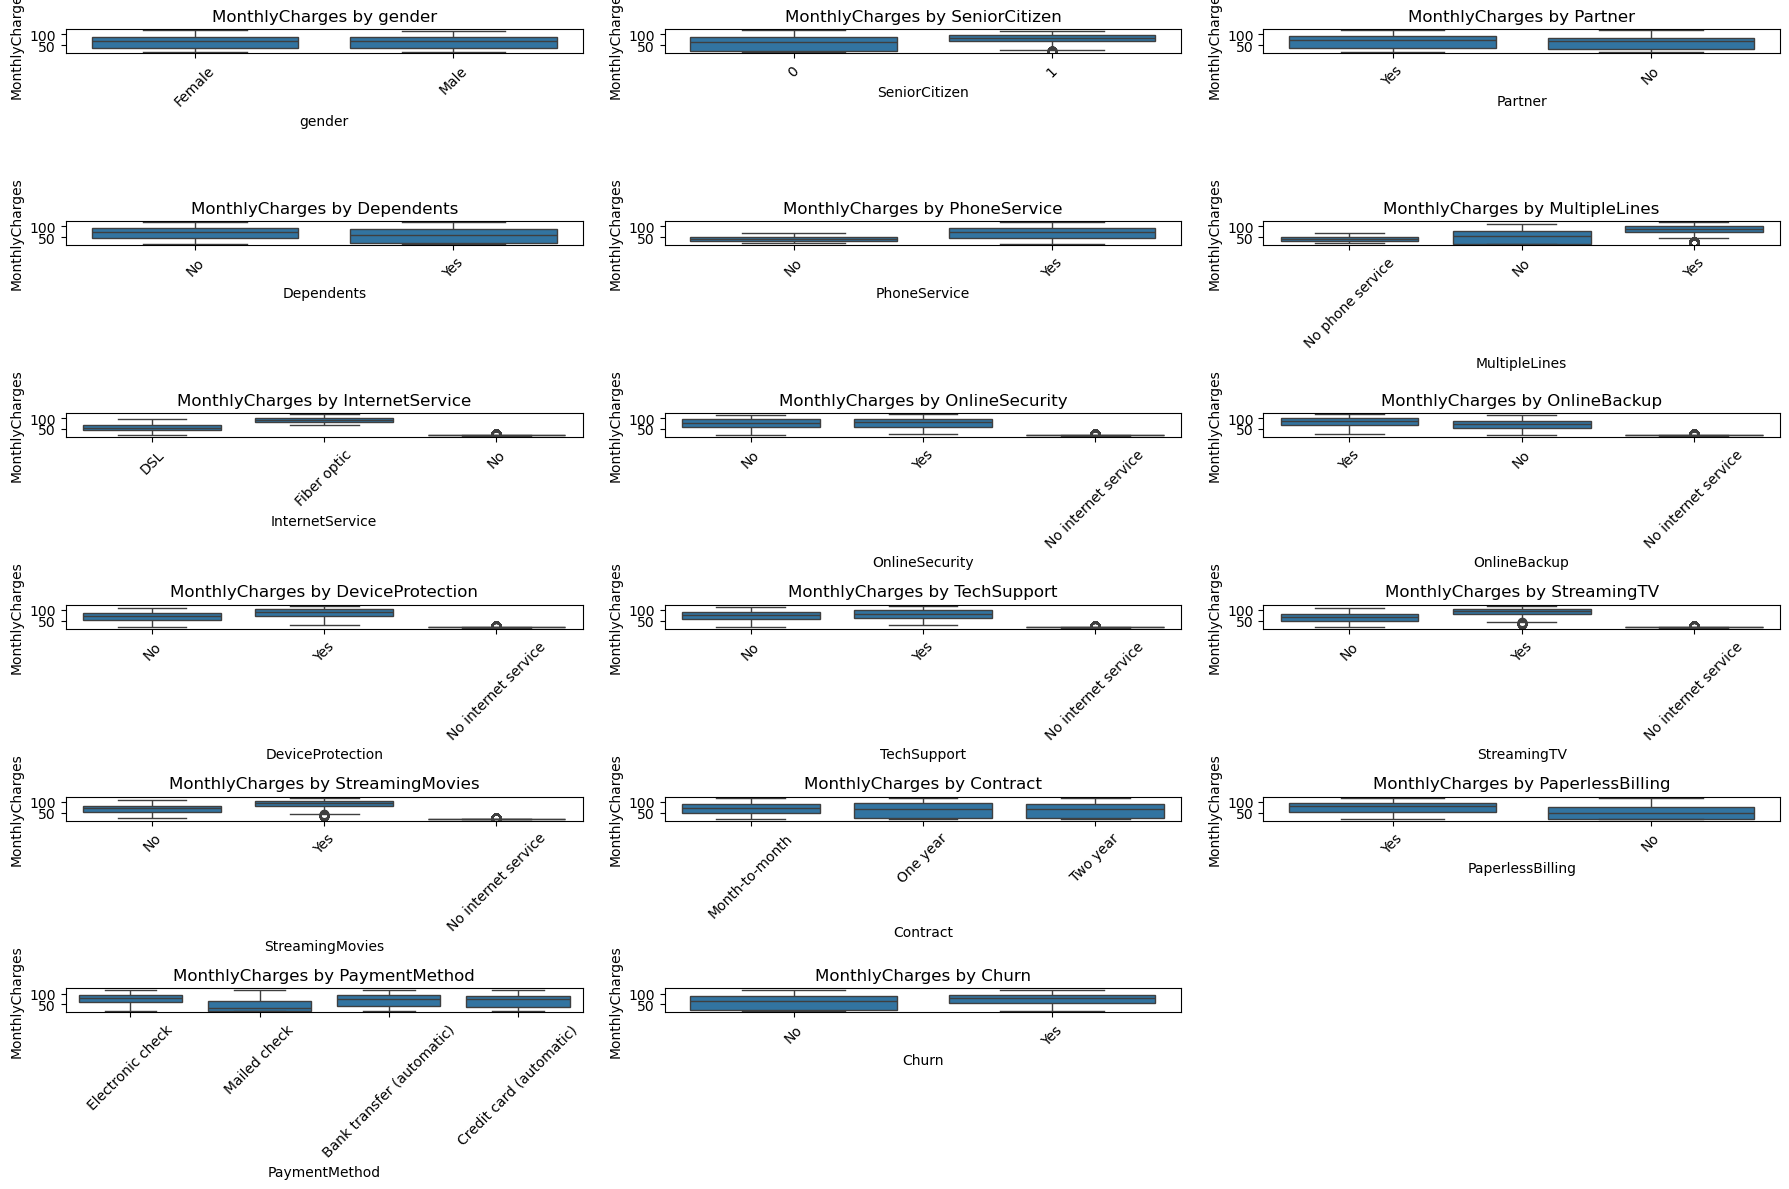

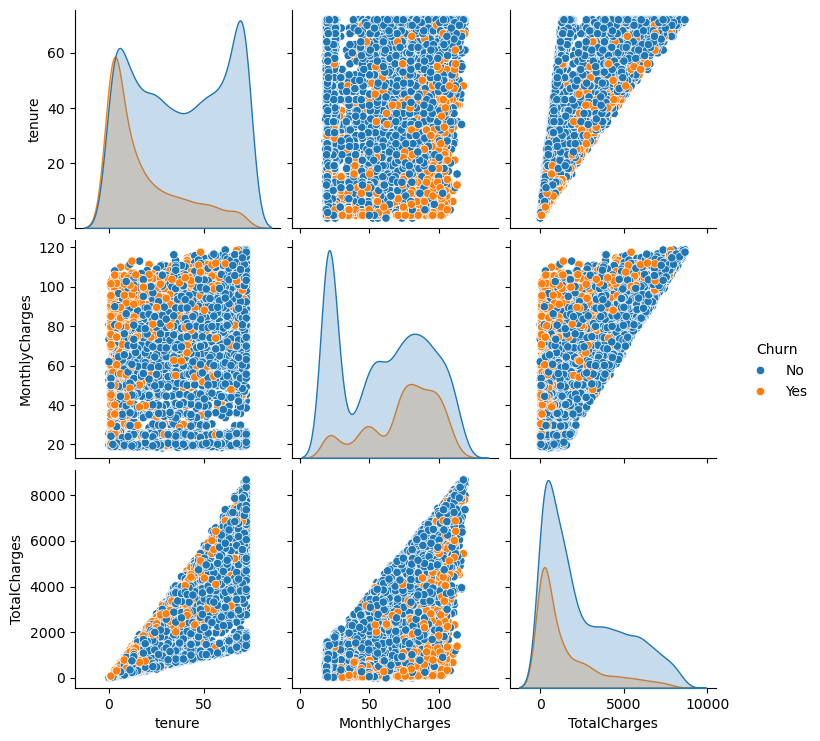

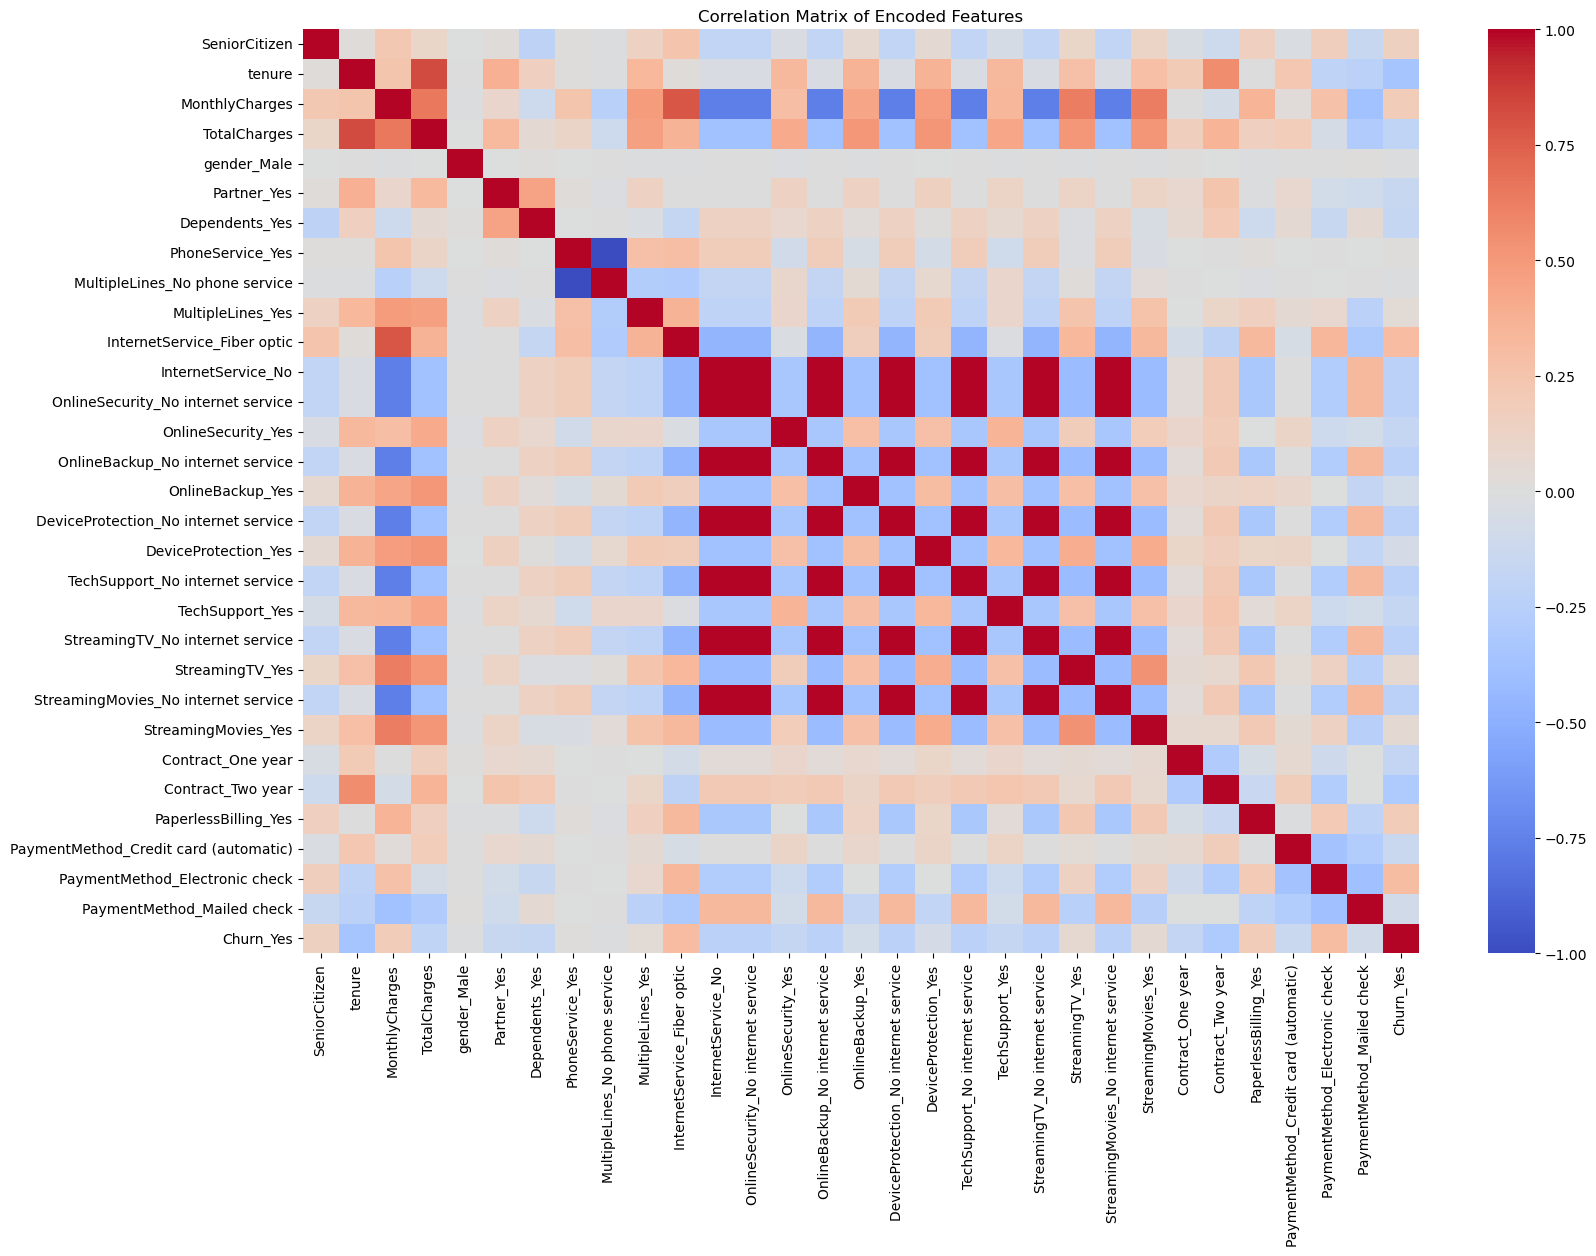

   MonthlyCharges_Tenure  TotalServices
0                  29.85              1
1                1936.30              3
2                 107.70              3
3                1903.50              3
4                 141.40              1


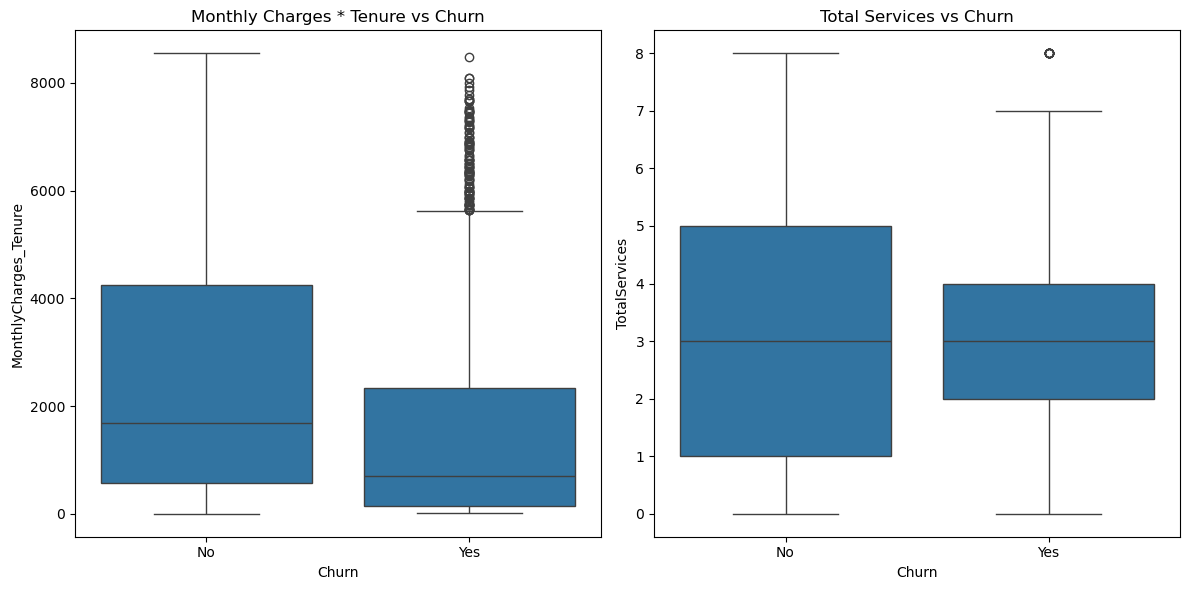

Logistic Regression - Accuracy: 0.8197303051809794 Precision: 0.6808510638297872 Recall: 0.6005361930294906 F1 Score: 0.6381766381766382
Random Forest - Accuracy: 0.7920511000709723 Precision: 0.650375939849624 Recall: 0.46380697050938335 F1 Score: 0.5414710485133021
SVM - Accuracy: 0.8126330731014905 Precision: 0.7026022304832714 Recall: 0.5067024128686327 F1 Score: 0.5887850467289719


In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn.exceptions import NotFittedError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
file_path = 'data/Big-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Display statistical summary of the dataset
print(data.describe())

# Read Large Datasets in Chunks
chunk_size = 1000 
data_chunk = pd.read_csv(file_path, chunksize = chunk_size)

# Process each chunk
for chunk in data_chunk:
    # Perform operations on each chunk
    print(chunk.info())
    print(chunk.head())
    break
	
# Sample Portion of Dataset
data_sample = pd.read_csv(file_path, nrows=1000)
print(data_sample.info())
print(data_sample.head())

# Visualizing the relationship between MonthlyCharges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

# Visualizing the relationship between Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

# Visualizing the relationship between Contract Type vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type vs Churn')
plt.show()

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for correlation matrix computation
numeric_data = data.drop(columns=non_numeric_columns)

# Heatmap for the correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop irrelevant columns (like customerID)
data = data.drop(columns=['customerID'])

# Convert TotalCharges to numeric, coerce errors to NaN, and fill NaN with 0
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Summary statistics for numerical features
print(data.describe())

# Distribution plots for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of MonthlyCharges')

plt.subplot(1, 3, 3)
sns.histplot(data['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of TotalCharges')

plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(18, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Heatmap for the correlations between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plots for categorical vs numerical features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=data[feature], y=data['MonthlyCharges'])
    plt.title(f'MonthlyCharges by {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pair plot for numerical features
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

# Heatmap including both numerical and categorical features
data_encoded = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(18, 12))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Encoded Features')
plt.show()

# New Features Creation
# Interaction Term: MonthlyCharges * tenure
data['MonthlyCharges_Tenure'] = data['MonthlyCharges'] * data['tenure']

# Aggregation: Total Number of Services
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Converting 'Yes', 'No', and 'No internet service'/'No phone service' to binary
for col in service_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Create a new feature for the total number of services a customer subscribes to
# Summing up the services
data['TotalServices'] = data[service_columns].sum(axis=1)

# Display the first few rows to verify the new features
print(data[['MonthlyCharges_Tenure', 'TotalServices']].head())

# Visualizing new features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges_Tenure', data=data)
plt.title('Monthly Charges * Tenure vs Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalServices', data=data)
plt.title('Total Services vs Churn')

plt.tight_layout()
plt.show()


# Encode categorical features using one-hot encoding
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod', 'Churn']

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split the data into features and target variable
X = data_encoded.drop(columns='Churn_Yes')
y = data_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values (if any)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyCharges_Tenure', 'TotalServices']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#### Model Training and Validation
### The following models will be trained and tested:

## Logistic Regression
## Random Forest
## Support Vector Machine (SVM)

# Initialize models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression metrics
print("Logistic Regression - Accuracy:", accuracy_log_reg, 
      "Precision:", precision_log_reg, 
      "Recall:", recall_log_reg, 
      "F1 Score:", f1_log_reg)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# Print Random Forest metrics
print("Random Forest - Accuracy:", accuracy_random_forest, 
      "Precision:", precision_random_forest, 
      "Recall:", recall_random_forest, 
      "F1 Score:", f1_random_forest)

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print SVM metrics
print("SVM - Accuracy:", accuracy_svm, 
      "Precision:", precision_svm, 
      "Recall:", recall_svm, 
      "F1 Score:", f1_svm)